In [62]:
import glob
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

from tqdm import tqdm

tqdm.pandas()

In [63]:
mpl.rcParams['figure.dpi'] = 120

In [64]:
data_base_dir = "data/by_date"

dates = []
for fpath in glob.glob(data_base_dir + "/*"):
    dates.append(fpath[len(data_base_dir) + 1:-4])

dates.sort()

In [65]:
dfs = {}
for date in dates:
    dfs[date] = pd.read_csv(f"{data_base_dir}/{date}.csv")

In [66]:
df = pd.concat(dfs)
df

speaker  \
1960-09-26 0     Howard Smith   
           1     John Kennedy   
           2     Howard Smith   
           3    Richard Nixon   
           4     Howard Smith   
...                       ...   
2020-09-29 927   Donald Trump   
           928  Chris Wallace   
           929  Chris Wallace   
           930      Joe Biden   
           931  Chris Wallace   

                                                             text  type  \
1960-09-26 0    Good evening. The television and radio station...  Pres   
           1    Mr. Smith, Mr. Nixon. In the election of 1860,...  Pres   
           2    And now the opening statement by Vice Presiden...  Pres   
           3    Mr. Smith, Senator Kennedy. The things that Se...  Pres   
           4    Thank you, Mr. Nixon. That completes the openi...  Pres   
...                                                           ...   ...   
2020-09-29 927                         And I think he does, too.   Pres   
           928                                    To be continued  Pres   
           929    as - - in more debates, as we go on. Preside...  Pres   
           930                                               Yes.  Pres   
           931    and the Cleveland Clinic for hosting this ev...  Pres   

                election_year        date  candidate  qud question  \
1960-09-26 0             1960  1960-09-26          0  NaN      NaN   
           1             1960  1960-09-26          1  NaN      NaN   
           2             1960  1960-09-26          0  NaN      NaN   
           3             1960  1960-09-26          1  NaN      NaN   
           4             1960  1960-09-26          0  NaN      NaN   
...                       ...         ...        ...  ...      ...   
2020-09-29 927           2020  2020-09-29          1  NaN      NaN   
           928           2020  2020-09-29          0  NaN      NaN   
           929           2020  2020-09-29          0  NaN      NaN   
           930           2020  2020-09-29          1  NaN      NaN   
           931           2020  2020-09-29          0  NaN      NaN   

                similarity_cls  similarity_max  similarity_mean  \
1960-09-26 0               NaN             NaN              NaN   
           1               NaN             NaN              NaN   
           2               NaN             NaN              NaN   
           3               NaN             NaN              NaN   
           4               NaN             NaN              NaN   
...                        ...             ...              ...   
2020-09-29 927             NaN             NaN              NaN   
           928             NaN             NaN              NaN   
           929             NaN             NaN              NaN   
           930             NaN             NaN              NaN   
           931             NaN             NaN              NaN   

                similarity_sbert       party question_clean  qud_answer_fit  \
1960-09-26 0                 NaN   Moderator            NaN             NaN   
           1                 NaN  Democratic            NaN             NaN   
           2                 NaN   Moderator            NaN             NaN   
           3                 NaN  Republican            NaN             NaN   
           4                 NaN   Moderator            NaN             NaN   
...                          ...         ...            ...             ...   
2020-09-29 927               NaN  Republican            NaN             NaN   
           928               NaN   Moderator            NaN             NaN   
           929               NaN   Moderator            NaN             NaN   
           930               NaN  Democratic            NaN             NaN   
           931               NaN   Moderator            NaN             NaN   

                qud_question_fit  winner  
1960-09-26 0                 NaN     NaN  
           1                 NaN     1.0  


In [67]:
df_filtered = df[df["question"].notnull()]

In [68]:
for i, d in enumerate(dates):
    print(f"{i}\t{d}\t{len(dfs[d])}\t{len(dfs[d].columns)}")

0	1960-09-26	68	17
1	1976-09-23	94	17
2	1980-09-21	76	17
3	1984-10-07	134	17
4	1988-09-25	161	17
5	1992-10-11	92	17
6	1996-10-06	144	17
7	2000-10-03	166	17
8	2004-09-30	142	17
9	2008-09-26	189	17
10	2012-10-03	210	17
11	2016-09-26	308	17
12	2020-09-29	932	17


In [69]:
for i, d in enumerate(dates):
    df_f = dfs[d][dfs[d]["question"].notnull()]
    print(f"{i}\t{d}\t{len(df_f)}\t{len(df_f.columns)}")

0	1960-09-26	10	17
1	1976-09-23	20	17
2	1980-09-21	12	17
3	1984-10-07	30	17
4	1988-09-25	23	17
5	1992-10-11	11	17
6	1996-10-06	21	17
7	2000-10-03	26	17
8	2004-09-30	18	17
9	2008-09-26	17	17
10	2012-10-03	25	17
11	2016-09-26	19	17
12	2020-09-29	39	17


In [70]:
debate_lenghts = df.groupby("date").size()
debate_lenghts_f = df_filtered.groupby("date").size()
debate_ratios = debate_lenghts_f / debate_lenghts
debate_lenghts, debate_lenghts_f, debate_ratios

(date
 1960-09-26     68
 1976-09-23     94
 1980-09-21     76
 1984-10-07    134
 1988-09-25    161
 1992-10-11     92
 1996-10-06    144
 2000-10-03    166
 2004-09-30    142
 2008-09-26    189
 2012-10-03    210
 2016-09-26    308
 2020-09-29    932
 dtype: int64,
 date
 1960-09-26    10
 1976-09-23    20
 1980-09-21    12
 1984-10-07    30
 1988-09-25    23
 1992-10-11    11
 1996-10-06    21
 2000-10-03    26
 2004-09-30    18
 2008-09-26    17
 2012-10-03    25
 2016-09-26    19
 2020-09-29    39
 dtype: int64,
 date
 1960-09-26    0.147059
 1976-09-23    0.212766
 1980-09-21    0.157895
 1984-10-07    0.223881
 1988-09-25    0.142857
 1992-10-11    0.119565
 1996-10-06    0.145833
 2000-10-03    0.156627
 2004-09-30    0.126761
 2008-09-26    0.089947
 2012-10-03    0.119048
 2016-09-26    0.061688
 2020-09-29    0.041845
 dtype: float64)

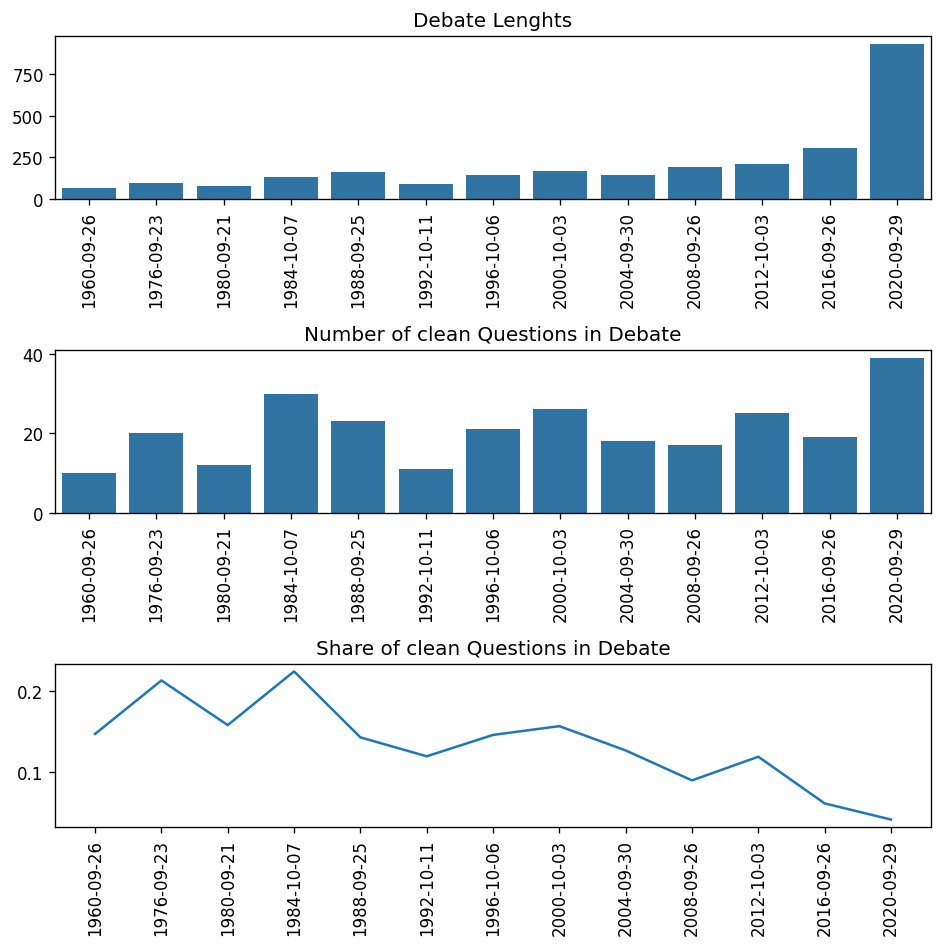

In [71]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

sns.barplot(data=debate_lenghts, ax=axs[0]).set_title("Debate Lenghts")
axs[0].set_xlabel(None)
sns.barplot(data=debate_lenghts_f, ax=axs[1]).set_title("Number of clean Questions in Debate")
axs[1].set_xlabel(None)
sns.lineplot(data=debate_ratios, ax=axs[2]).set_title("Share of clean Questions in Debate")
axs[2].set_xlabel(None)

for ax in axs:
    ax.tick_params(axis='x', rotation=90)
    
plt.tight_layout()

os.makedirs(f"figures/", exist_ok=True)
plt.savefig(f"figures/debate_lengths.png", transparent=True)

In [76]:
df_filtered[df_filtered["qud_answer_fit"].notnull()]["qud_answer_fit"].mean()

np.float64(2.726937269372694)

In [77]:
len(df_filtered[df_filtered["qud_answer_fit"] == 3]) / len(
    df_filtered[df_filtered["qud_answer_fit"].notnull()]
), len(df_filtered[df_filtered["qud_answer_fit"] == 2]) / len(
    df_filtered[df_filtered["qud_answer_fit"].notnull()]
), len(
    df_filtered[df_filtered["qud_answer_fit"] == 1]
) / len(
    df_filtered[df_filtered["qud_answer_fit"].notnull()]
)

(0.7675276752767528, 0.1918819188191882, 0.04059040590405904)

In [78]:
df_filtered[df_filtered["qud_answer_fit"] == 1]

speaker  \
1976-09-23 17     Jimmy Carter   
1980-09-21 54    Ronald Reagan   
1984-10-07 5    Walter Mondale   
           16   Walter Mondale   
           108  Walter Mondale   
1996-10-06 116        Bob Dole   
2004-09-30 49   George W. Bush   
2012-10-03 170    Barack Obama   
2016-09-26 199    Donald Trump   
2020-09-29 176    Donald Trump   
           544    Donald Trump   

                                                             text  type  \
1976-09-23 17   Well, as a matter of fact there is. If we assu...  Pres   
1980-09-21 54   Miss Quinn, I dont have to. Ive done it. We ha...  Pres   
1984-10-07 5    One of the key tests of leadership is whether ...  Pres   
           16   Well, I think were getting better all the time...  Pres   
           108  Do you want to give me some suggestions? [Laug...  Pres   
1996-10-06 116  Let me say first, on the Presidents promise fo...  Pres   
2004-09-30 49   No, what I said was that, because we achieved ...  Pres   
2012-10-03 170    Well, I definitely think there are differences.  Pres   
2016-09-26 199  I do want to say that I was just endorsed— and...  Pres   
2020-09-29 176  If we would've listened to you, the country wo...  Pres   
           544  If you were a certain person, you had no statu...  Pres   

                election_year        date  candidate  \
1976-09-23 17            1976  1976-09-23          1   
1980-09-21 54            1980  1980-09-21          1   
1984-10-07 5             1984  1984-10-07          1   
           16            1984  1984-10-07          1   
           108           1984  1984-10-07          1   
1996-10-06 116           1996  1996-10-06          1   
2004-09-30 49            2004  2004-09-30          1   
2012-10-03 170           2012  2012-10-03          1   
2016-09-26 199           2016  2016-09-26          1   
2020-09-29 176           2020  2020-09-29          1   
           544           2020  2020-09-29          1   

                                                              qud  \
1976-09-23 17   How can we achieve a balanced budget by fiscal...   
1980-09-21 54   What evidence supports the assertion that gove...   
1984-10-07 5    What should be done to address the significant...   
           16   What is the importance of the President's lead...   
           108  What steps should be taken to address America'...   
1996-10-06 116  What is the importance of economic reform and ...   
2004-09-30 49   What is the importance of maintaining a consis...   
2012-10-03 170    What are the key differences being referred to?   
2016-09-26 199  What are the implications of recent endorsemen...   
2020-09-29 176  What impact did the decision to close borders ...   
           544  What actions will be taken to address the teac...   

                                                         question  \
1976-09-23 17   Uh Governor Carter, you proposed a number of n...   
1980-09-21 54   Mr. Anderson, Ill call you for that forecast. ...   
1984-10-07 5    Mr. Mondale, the Carter- Mondale administratio...   
           16   You have said, Mr. Mondale, that the polls hav...   
           108  Since we are reaching the end of the question ...   
1996-10-06 116  Senator Dole, weve talked mostly now about dif...   
2004-09-30 49   New question, Mr. President, two minutes. You ...   
2012-10-03 170  Role of government. And it is — you are first ...   
2016-09-26 199  Our next segment is called “Securing America. ...   
2020-09-29 176  So my question to you, is you have refused in ...   
           544  What is radical about racial sensitivity train...   

                similarity_cls  similarity_max  similarity_mean  \
1976-09-23 17         0.832157        0.922069         0.838746   
1980-09-21 54         0.842285        0.902695         0.699583   
1984-10-07 5          0.887129        0.931745         0.865438   
           16         0.889838        0.899285         0.694392   
           108        0.880463        0.907650 

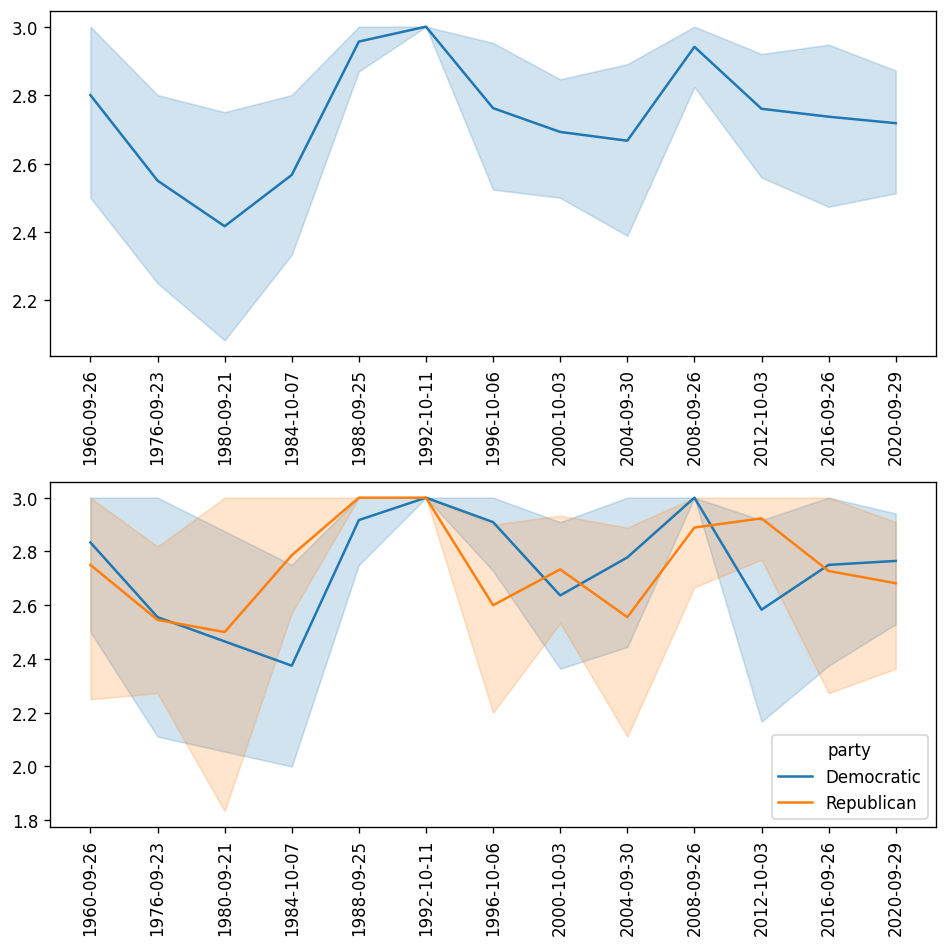

In [82]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

sns.lineplot(data=df, x="date", y="qud_answer_fit", ax=axs[0])#.set_title("QUD-Answer Alignment")
sns.lineplot(data=df[df["party"].isin(["Democratic", "Republican"])], x="date", y="qud_answer_fit", hue="party", ax=axs[1])#.set_title("QUD-Answer Alignment")

# axs[0, 0].legend(loc='lower right')

for a in axs:
    a.set_xlabel(None)
    a.set_ylabel(None)
    a.tick_params(axis='x', rotation=90)

fig.tight_layout()

os.makedirs(f"figures/", exist_ok=True)
plt.savefig(f"figures/qud_answer_alignment.png", transparent=True)

In [79]:
df_filtered[df_filtered["qud_question_fit"].notnull()]["qud_question_fit"].mean()

np.float64(2.6162361623616235)

In [80]:
len(df_filtered[df_filtered["qud_question_fit"] == 3]) / len(
    df_filtered[df_filtered["qud_question_fit"].notnull()]
), len(df_filtered[df_filtered["qud_question_fit"] == 2]) / len(
    df_filtered[df_filtered["qud_question_fit"].notnull()]
), len(
    df_filtered[df_filtered["qud_question_fit"] == 1]
) / len(
    df_filtered[df_filtered["qud_question_fit"].notnull()]
)

(0.7269372693726938, 0.16236162361623616, 0.11070110701107011)

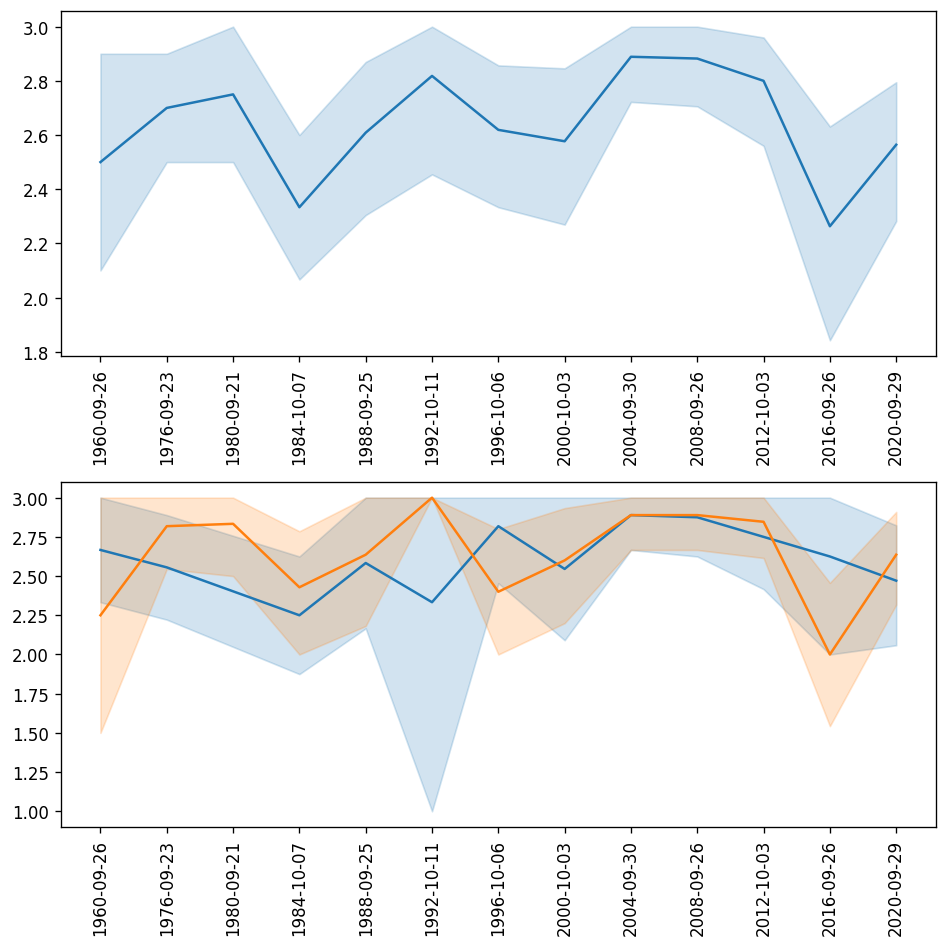

In [83]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

sns.lineplot(data=df, x="date", y="qud_question_fit", ax=axs[0], legend=False)#.set_title("QUD-Question Alignment")
sns.lineplot(data=df[df["party"].isin(["Democratic", "Republican"])], x="date", y="qud_question_fit", hue="party", ax=axs[1], legend=False)#.set_title("QUD-Question Alignment")

# axs[0, 0].legend(loc='lower right')

for a in axs:
    a.set_xlabel(None)
    a.set_ylabel(None)
    a.tick_params(axis='x', rotation=90)

fig.tight_layout()

os.makedirs(f"figures/", exist_ok=True)
plt.savefig(f"figures/qud_question_alignment.png", transparent=True)

In [91]:
qud_fits_by_debate = df_filtered.groupby("date").agg({"qud_answer_fit": ["mean", lambda x: sum([1 for y in x if y == 3]) / len(x)], "qud_question_fit": ["mean", lambda x: sum([1 for y in x if y == 3]) / len(x)]})
qud_fits_by_debate

qud_answer_fit            qud_question_fit           
                     mean <lambda_0>             mean <lambda_0>
date                                                            
1960-09-26       2.800000   0.800000         2.500000   0.600000
1976-09-23       2.550000   0.600000         2.700000   0.700000
1980-09-21       2.416667   0.500000         2.750000   0.750000
1984-10-07       2.566667   0.666667         2.333333   0.533333
1988-09-25       2.956522   0.956522         2.608696   0.739130
1992-10-11       3.000000   1.000000         2.818182   0.909091
1996-10-06       2.761905   0.809524         2.619048   0.714286
2000-10-03       2.692308   0.692308         2.576923   0.730769
2004-09-30       2.666667   0.722222         2.888889   0.888889
2008-09-26       2.941176   0.941176         2.882353   0.882353
2012-10-03       2.760000   0.800000         2.800000   0.840000
2016-09-26       2.736842   0.789474         2.263158   0.526316
2020-09-29       2.717949   0.769231         2.564103   0.743590

In [72]:
df_melted = pd.melt(
    df,
    id_vars=[
        col
        for col in df.columns
        if col
        not in [
            "similarity_cls",
            "similarity_mean",
            "similarity_max",
            "similarity_sbert",
        ]
    ],
    var_name="measure",
    value_name="similarity",
)
df_melted

,speaker,text,type,election_year,date,candidate,qud,question,party,question_clean,qud_answer_fit,qud_question_fit,winner,measure,similarity
0,Howard Smith,Good evening. The television and radio station...,Pres,1960,1960-09-26,0,NaN,NaN,Moderator,NaN,NaN,NaN,NaN,similarity_cls,NaN
1,John Kennedy,"Mr. Smith, Mr. Nixon. In the election of 1860,...",Pres,1960,1960-09-26,1,NaN,NaN,Democratic,NaN,NaN,NaN,1.0,similarity_cls,NaN
2,Howard Smith,And now the opening statement by Vice Presiden...,Pres,1960,1960-09-26,0,NaN,NaN,Moderator,NaN,NaN,NaN,NaN,similarity_cls,NaN
3,Richard Nixon,"Mr. Smith, Senator Kennedy. The things that Se...",Pres,1960,1960-09-26,1,NaN,NaN,Republican,NaN,NaN,NaN,0.0,similarity_cls,NaN
4,Howard Smith,"Thank you, Mr. Nixon. That completes the openi...",Pres,1960,1960-09-26,0,NaN,NaN,Moderator,NaN,NaN,NaN,NaN,similarity_cls,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,Donald Trump,"And I think he does, too.",Pres,2020,2020-09-29,1,NaN,NaN,Republican,NaN,NaN,NaN,0.0,similarity_sbert,NaN
10860,Chris Wallace,To be continued,Pres,2020,2020-09-29,0,NaN,NaN,Moderator,NaN,NaN,NaN,NaN,similarity_sbert,NaN
10861,Chris Wallace,"as - - in more debates, as we go on. Preside...",Pres,2020,2020-09-29,0,NaN,NaN,Moderator,NaN,NaN,NaN,NaN,similarity_sbert,NaN
10862,Joe Biden,Yes.,Pres,2020,2020-09-29,1,NaN,NaN,Democratic,NaN,NaN,NaN,1.0,similarity_sbert,NaN


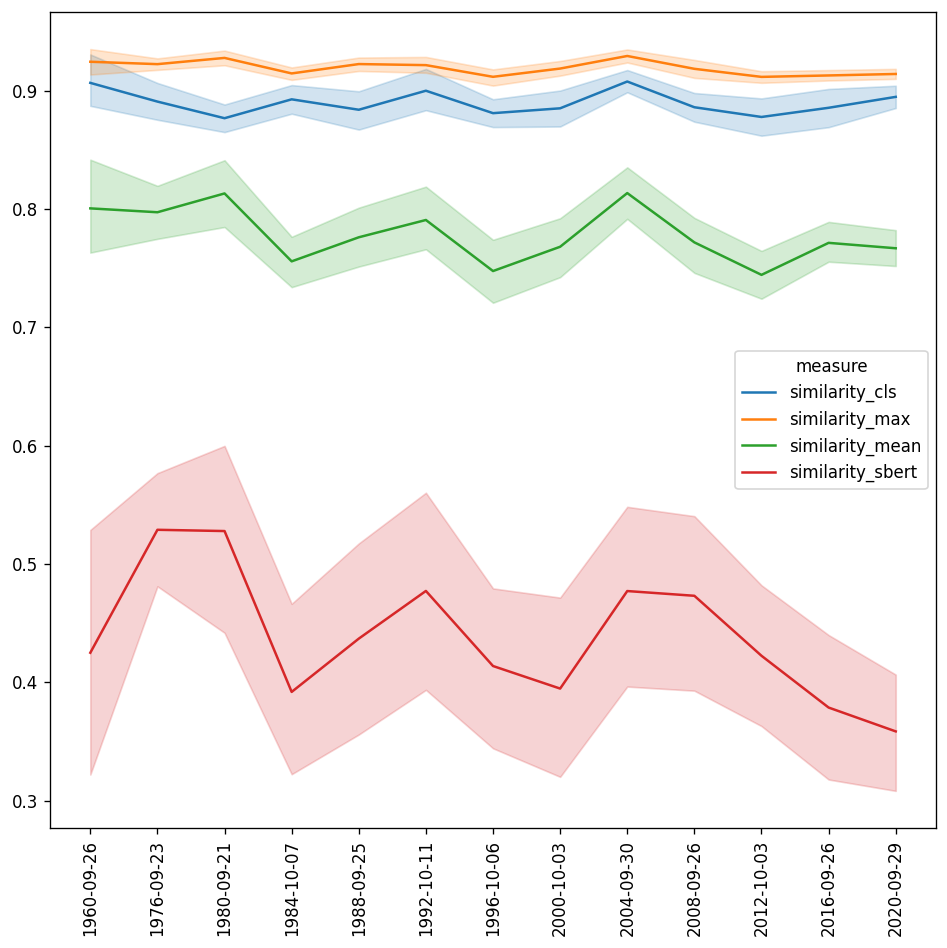

In [74]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(data=df_melted, x="date", y="similarity", hue="measure", ax=ax)

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='x', rotation=90)

fig.tight_layout()

os.makedirs(f"figures/", exist_ok=True)
plt.savefig(f"figures/similarities_by_debate.png", transparent=True)

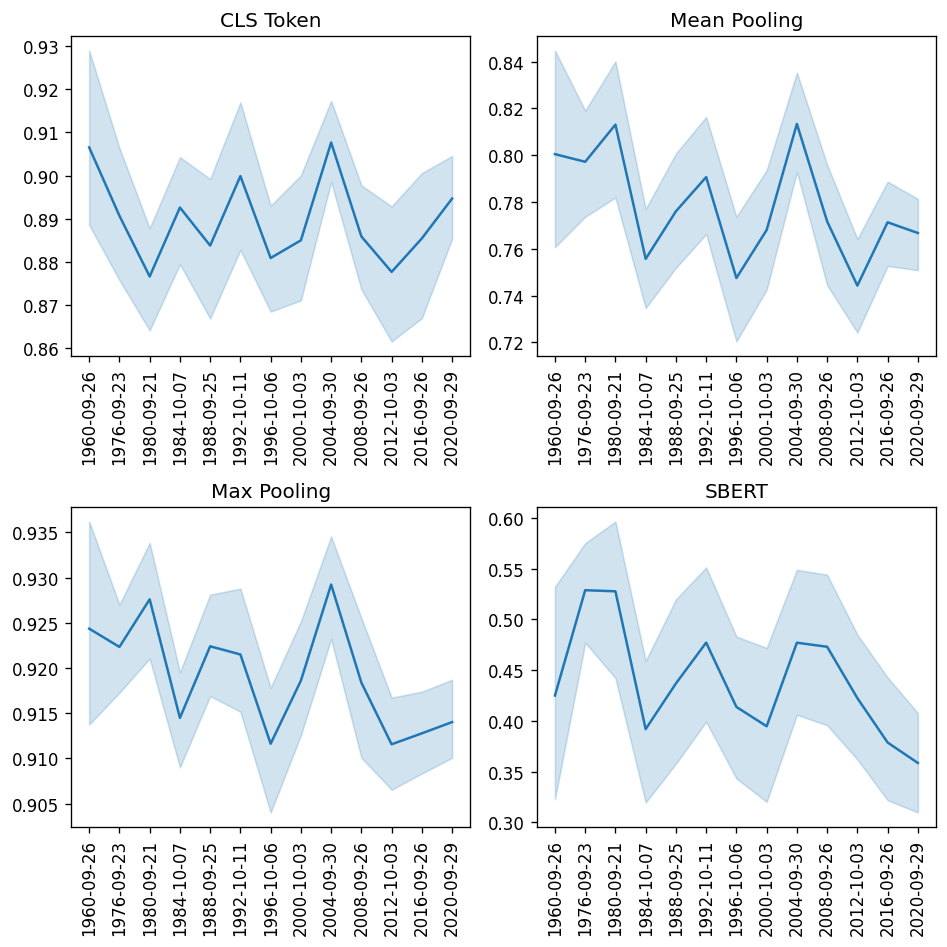

In [73]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.lineplot(data=df, x="date", y="similarity_cls", ax=axs[0, 0]).set_title("CLS Token")
sns.lineplot(data=df, x="date", y="similarity_mean", ax=axs[0, 1]).set_title("Mean Pooling")
sns.lineplot(data=df, x="date", y="similarity_max", ax=axs[1, 0]).set_title("Max Pooling")
sns.lineplot(data=df, x="date", y="similarity_sbert", ax=axs[1, 1]).set_title("SBERT")

for ax in axs:
    for a in ax:
        a.set_xlabel(None)
        a.set_ylabel(None)
        a.tick_params(axis='x', rotation=90)

# fig.suptitle('Embedding Similarity') 
fig.tight_layout()

os.makedirs(f"figures/", exist_ok=True)
plt.savefig(f"figures/similarities_by_debate_split.png", transparent=True)

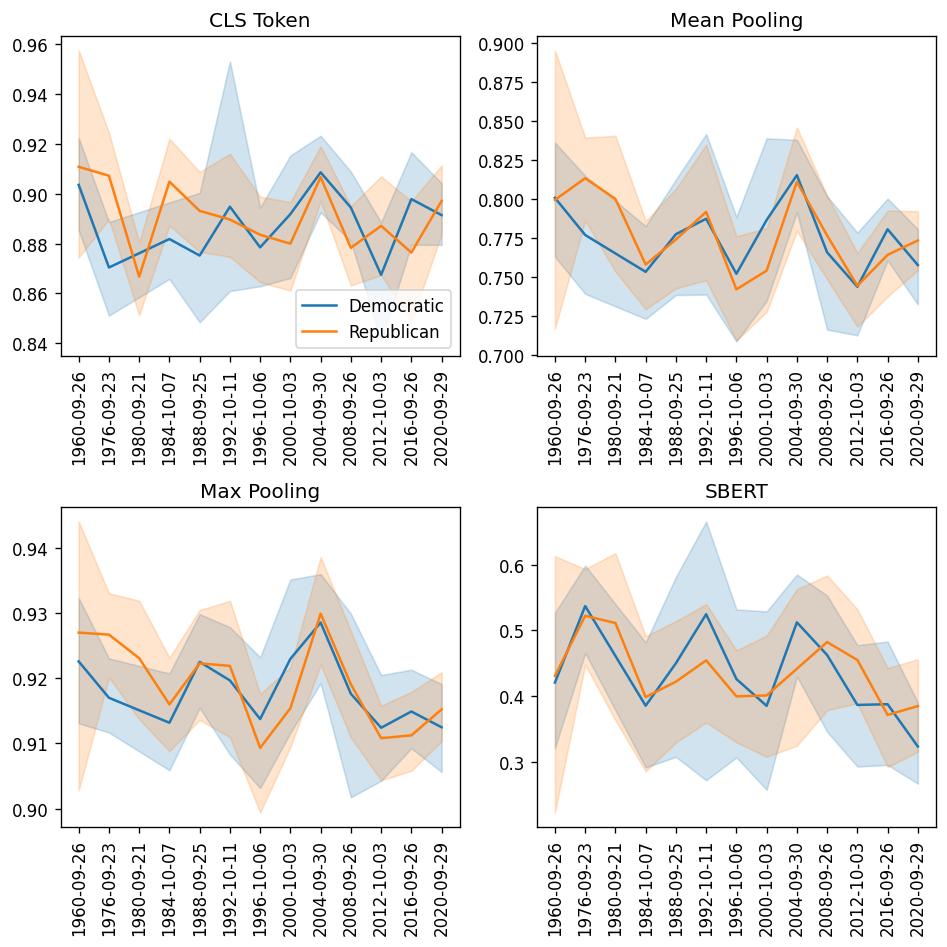

In [75]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.lineplot(data=df[df["party"].isin(["Democratic", "Republican"])], x="date", y="similarity_cls", hue="party", ax=axs[0, 0]).set_title("CLS Token")
sns.lineplot(data=df[df["party"].isin(["Democratic", "Republican"])], x="date", y="similarity_mean", hue="party", ax=axs[0, 1], legend=False).set_title("Mean Pooling")
sns.lineplot(data=df[df["party"].isin(["Democratic", "Republican"])], x="date", y="similarity_max", hue="party", ax=axs[1, 0], legend=False).set_title("Max Pooling")
sns.lineplot(data=df[df["party"].isin(["Democratic", "Republican"])], x="date", y="similarity_sbert", hue="party", ax=axs[1, 1], legend=False).set_title("SBERT")

axs[0, 0].legend(loc='lower right')

for ax in axs:
    for a in ax:
        a.set_xlabel(None)
        a.set_ylabel(None)
        a.tick_params(axis='x', rotation=90)

fig.tight_layout()

os.makedirs(f"figures/", exist_ok=True)
plt.savefig(f"figures/similarities_by_debate_by_party_split.png", transparent=True)

/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_1577/873249893.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(["Weak", "Partial", "Strong"])
/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_1577/873249893.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(["Weak", "Partial", "Strong"])
/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_1577/873249893.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(["Weak", "Partial", "Strong"])
/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_1577/873249893.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xti

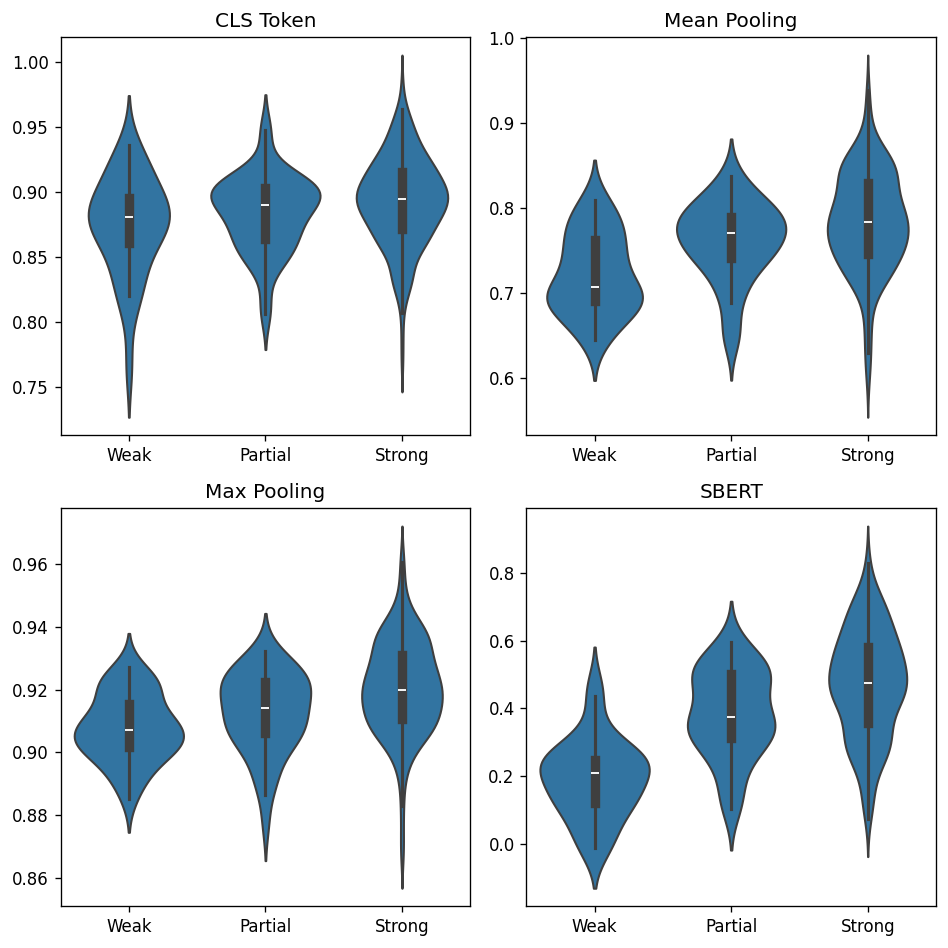

In [84]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.violinplot(
    data=df_filtered, x="qud_question_fit", y="similarity_cls", ax=axs[0, 0]
).set_title("CLS Token")
sns.violinplot(
    data=df_filtered, x="qud_question_fit", y="similarity_mean", ax=axs[0, 1]
).set_title("Mean Pooling")
sns.violinplot(
    data=df_filtered, x="qud_question_fit", y="similarity_max", ax=axs[1, 0]
).set_title("Max Pooling")
sns.violinplot(
    data=df_filtered, x="qud_question_fit", y="similarity_sbert", ax=axs[1, 1]
).set_title("SBERT")

for ax in axs:
    for a in ax:
        a.set_xlabel(None)
        a.set_ylabel(None)
        a.set_xticklabels(["Weak", "Partial", "Strong"])


# fig.suptitle('Embedding Similarity')
fig.tight_layout()

os.makedirs(f"figures/", exist_ok=True)
plt.savefig(f"figures/similarity_by_fit_violin.png", transparent=True)

/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_1577/509138666.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(["Weak", "Partial", "Strong"])
/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_1577/509138666.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(["Weak", "Partial", "Strong"])
/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_1577/509138666.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(["Weak", "Partial", "Strong"])
/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_1577/509138666.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xti

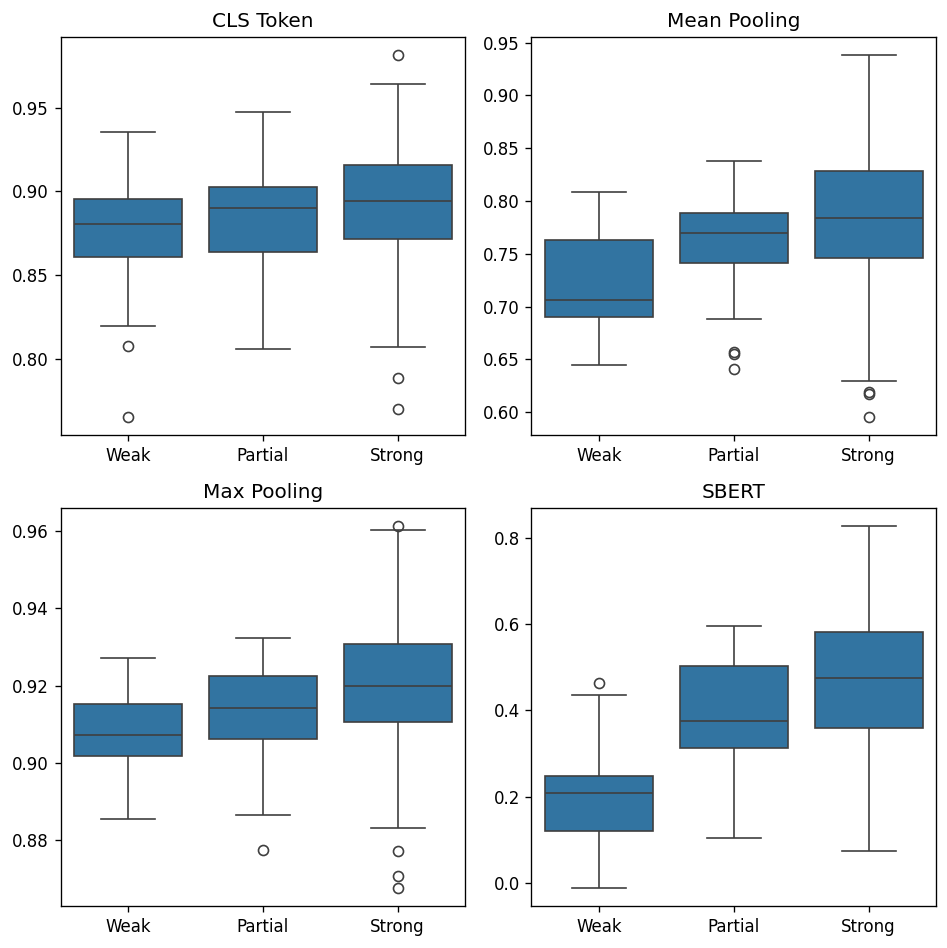

In [85]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.boxplot(
    data=df_filtered, x="qud_question_fit", y="similarity_cls", ax=axs[0, 0]
).set_title("CLS Token")
sns.boxplot(
    data=df_filtered, x="qud_question_fit", y="similarity_mean", ax=axs[0, 1]
).set_title("Mean Pooling")
sns.boxplot(
    data=df_filtered, x="qud_question_fit", y="similarity_max", ax=axs[1, 0]
).set_title("Max Pooling")
sns.boxplot(
    data=df_filtered, x="qud_question_fit", y="similarity_sbert", ax=axs[1, 1]
).set_title("SBERT")

for ax in axs:
    for a in ax:
        a.set_xlabel(None)
        a.set_ylabel(None)
        a.set_xticklabels(["Weak", "Partial", "Strong"])

# fig.suptitle('Embedding Similarity')
fig.tight_layout()

os.makedirs(f"figures/", exist_ok=True)
plt.savefig(f"figures/similarity_by_fit_bar.png", transparent=True)

In [86]:
ttest_results = pd.DataFrame(columns=["Pooling Method", "Alignment", "Weak", "Partial", "Strong"], data=[
    ["CLS Token", "Weak"] + [round(stats.ttest_ind(
        df_filtered[df_filtered["qud_question_fit"] == 1]["similarity_cls"].to_numpy(),
        df_filtered[df_filtered["qud_question_fit"] == i]["similarity_cls"].to_numpy(),
    ).pvalue, 4) for i in range(1, 4)],
    ["CLS Token", "Partial"] + [round(stats.ttest_ind(
        df_filtered[df_filtered["qud_question_fit"] == 2]["similarity_cls"].to_numpy(),
        df_filtered[df_filtered["qud_question_fit"] == i]["similarity_cls"].to_numpy(),
    ).pvalue, 4) for i in range(1, 4)],
    ["CLS Token", "Strong"] + [round(stats.ttest_ind(
        df_filtered[df_filtered["qud_question_fit"] == 3]["similarity_cls"].to_numpy(),
        df_filtered[df_filtered["qud_question_fit"] == i]["similarity_cls"].to_numpy(),
    ).pvalue, 4) for i in range(1, 4)],
    ["Mean Pooling", "Weak"] + [round(stats.ttest_ind(
        df_filtered[df_filtered["qud_question_fit"] == 1]["similarity_mean"].to_numpy(),
        df_filtered[df_filtered["qud_question_fit"] == i]["similarity_mean"].to_numpy(),
    ).pvalue, 4) for i in range(1, 4)],
    ["Mean Pooling", "Partial"] + [round(stats.ttest_ind(
        df_filtered[df_filtered["qud_question_fit"] == 2]["similarity_mean"].to_numpy(),
        df_filtered[df_filtered["qud_question_fit"] == i]["similarity_mean"].to_numpy(),
    ).pvalue, 4) for i in range(1, 4)],
    ["Mean Pooling", "Strong"] + [round(stats.ttest_ind(
        df_filtered[df_filtered["qud_question_fit"] == 3]["similarity_mean"].to_numpy(),
        df_filtered[df_filtered["qud_question_fit"] == i]["similarity_mean"].to_numpy(),
    ).pvalue, 4) for i in range(1, 4)],
    ["Max Pooling", "Weak"] + [round(stats.ttest_ind(
        df_filtered[df_filtered["qud_question_fit"] == 1]["similarity_max"].to_numpy(),
        df_filtered[df_filtered["qud_question_fit"] == i]["similarity_max"].to_numpy(),
    ).pvalue, 4) for i in range(1, 4)],
    ["Max Pooling", "Partial"] + [round(stats.ttest_ind(
        df_filtered[df_filtered["qud_question_fit"] == 2]["similarity_max"].to_numpy(),
        df_filtered[df_filtered["qud_question_fit"] == i]["similarity_max"].to_numpy(),
    ).pvalue, 4) for i in range(1, 4)],
    ["Max Pooling", "Strong"] + [round(stats.ttest_ind(
        df_filtered[df_filtered["qud_question_fit"] == 3]["similarity_max"].to_numpy(),
        df_filtered[df_filtered["qud_question_fit"] == i]["similarity_max"].to_numpy(),
    ).pvalue, 4) for i in range(1, 4)],
    ["SBERT", "Weak"] + [round(stats.ttest_ind(
        df_filtered[df_filtered["qud_question_fit"] == 1]["similarity_sbert"].to_numpy(),
        df_filtered[df_filtered["qud_question_fit"] == i]["similarity_sbert"].to_numpy(),
    ).pvalue, 4) for i in range(1, 4)],
    ["SBERT", "Partial"] + [round(stats.ttest_ind(
        df_filtered[df_filtered["qud_question_fit"] == 2]["similarity_sbert"].to_numpy(),
        df_filtered[df_filtered["qud_question_fit"] == i]["similarity_sbert"].to_numpy(),
    ).pvalue, 4) for i in range(1, 4)],
    ["SBERT", "Strong"] + [round(stats.ttest_ind(
        df_filtered[df_filtered["qud_question_fit"] == 3]["similarity_sbert"].to_numpy(),
        df_filtered[df_filtered["qud_question_fit"] == i]["similarity_sbert"].to_numpy(),
    ).pvalue, 4) for i in range(1, 4)],
])

ttest_results

,Pooling Method,Alignment,Weak,Partial,Strong
0,CLS Token,Weak,1.0000,0.2127,0.0072
1,CLS Token,Partial,0.2127,1.0000,0.1198
2,CLS Token,Strong,0.0072,0.1198,1.0000
3,Mean Pooling,Weak,1.0000,0.0007,0.0000
4,Mean Pooling,Partial,0.0007,1.0000,0.0161
5,Mean Pooling,Strong,0.0000,0.0161,1.0000
6,Max Pooling,Weak,1.0000,0.0893,0.0000
7,Max Pooling,Partial,0.0893,1.0000,0.0012
8,Max Pooling,Strong,0.0000,0.0012,1.0000
9,SBERT,Weak,1.0000,0.0000,0.0000


/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_1577/1355741978.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Lost Election", "Won Election"])


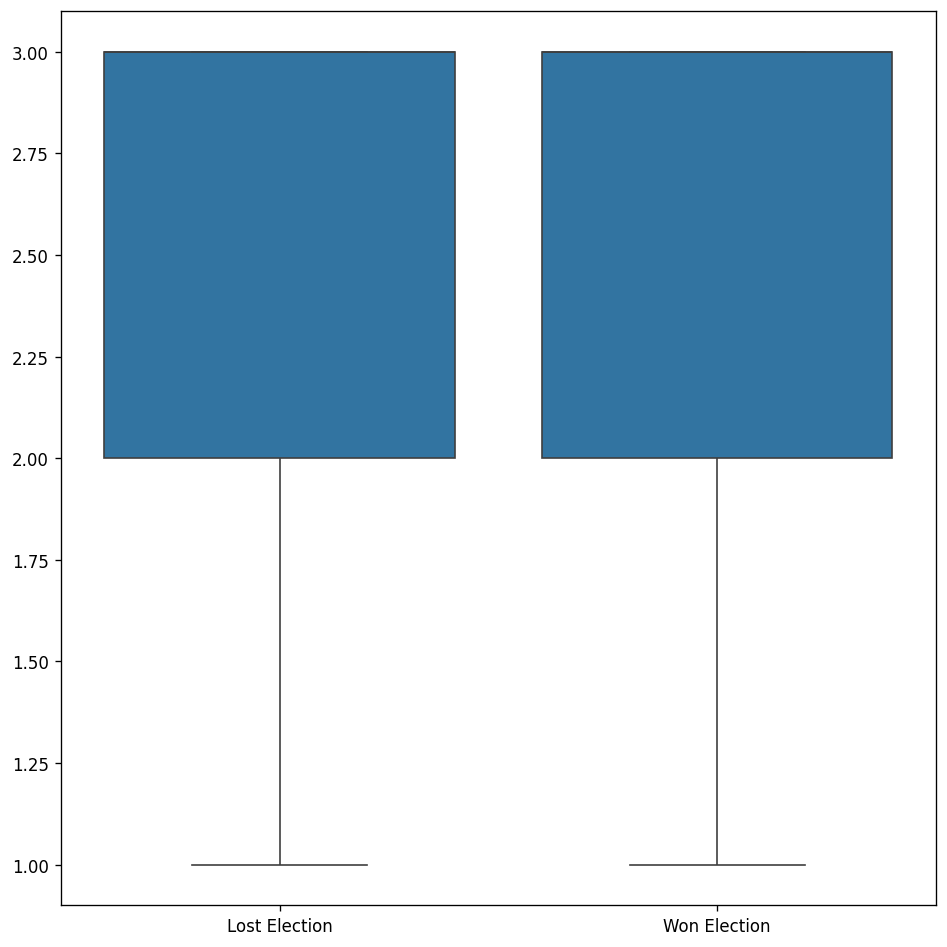

In [90]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=df_melted, x="winner", y="qud_question_fit", ax=ax)

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticklabels(["Lost Election", "Won Election"])

fig.tight_layout()

os.makedirs(f"figures/", exist_ok=True)
plt.savefig(f"figures/alignment_by_win_bar.png", transparent=True)

/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_1577/2256003725.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(["Lost Election", "Won Election"])
/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_1577/2256003725.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(["Lost Election", "Won Election"])
/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_1577/2256003725.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(["Lost Election", "Won Election"])
/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_1577/2256003725.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoca

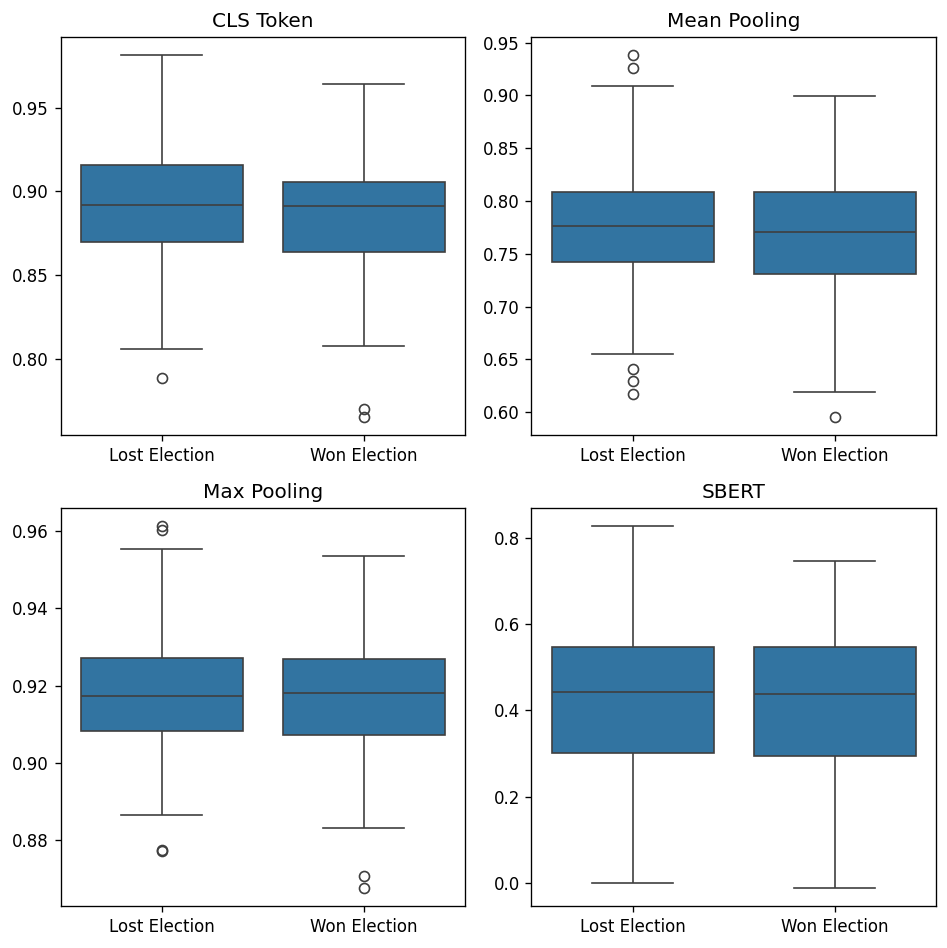

In [89]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.boxplot(
    data=df_filtered, x="winner", y="similarity_cls", ax=axs[0, 0]
).set_title("CLS Token")
sns.boxplot(
    data=df_filtered, x="winner", y="similarity_mean", ax=axs[0, 1]
).set_title("Mean Pooling")
sns.boxplot(
    data=df_filtered, x="winner", y="similarity_max", ax=axs[1, 0]
).set_title("Max Pooling")
sns.boxplot(
    data=df_filtered, x="winner", y="similarity_sbert", ax=axs[1, 1]
).set_title("SBERT")

for ax in axs:
    for a in ax:
        a.set_xlabel(None)
        a.set_ylabel(None)
        a.set_xticklabels(["Lost Election", "Won Election"])

# fig.suptitle('Embedding Similarity')
fig.tight_layout()

os.makedirs(f"figures/", exist_ok=True)
plt.savefig(f"figures/similarity_by_win_bar.png", transparent=True)